In [1]:
import numpy as np
import matplotlib.pyplot as plt
import corner

In [2]:
DATA_DIR = "/Users/research/projects/notes/"
KOI_ID = "1000"
PLANET_NO = "1"

In [3]:
# load the raw data
file = DATA_DIR + "koi{0}.n/mcmc.{0}.n{1}.dat.gz".format(KOI_ID, PLANET_NO)
rawdata = np.loadtxt(file, skiprows=1, usecols=[12,11,14,13,3])

# put into a dictionary
data = {}
keys = "P t0 r b rho".split()

for i, k in enumerate(keys):
    data[k] = rawdata[:,i]
    
# remove burn in
BURN = 0.2
keep = np.linspace(0,1,len(data["r"])) > BURN

for i, k in enumerate(keys):
    data[k] = data[k][keep]

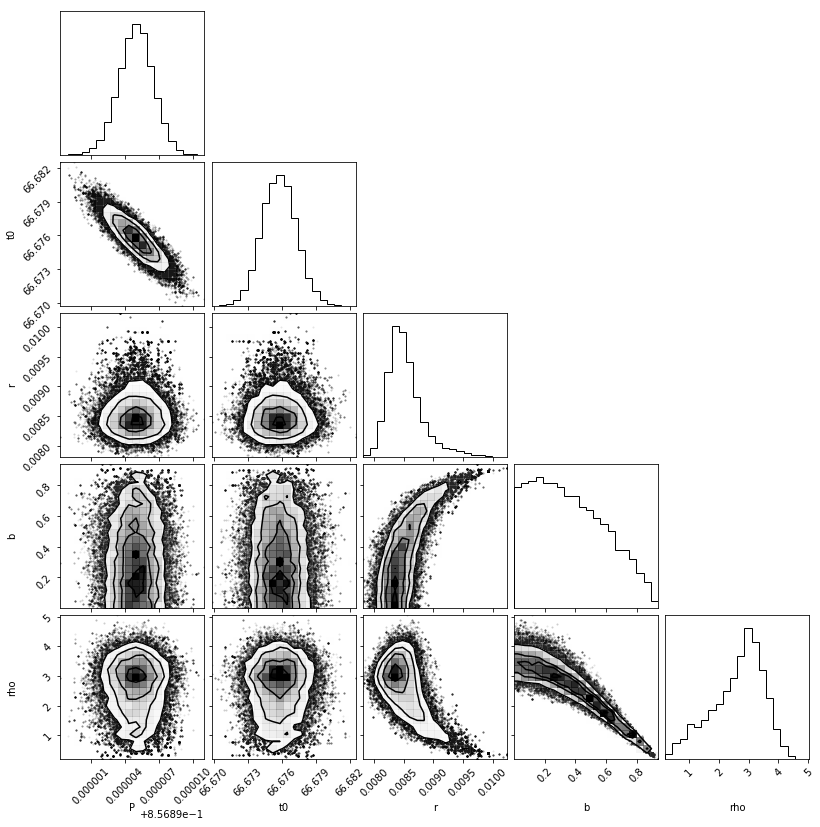

In [4]:
fig = corner.corner(data);

plt.savefig(DATA_DIR + "Figures/{0}_{1}_corner.png".format(KOI_ID, PLANET_NO), bbox_inches="tight")